<a href="https://www.kaggle.com/code/brunofacco/linear-regression-submission-ibm-lrg?scriptVersionId=102762854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# APPLYING LINEAR REFRESSION WITH MEDICAL DATASET

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
filter_col = df.dtypes == np.object

In [9]:
df_categ = df.columns[filter_col]

In [10]:
df_categ

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for category in df_categ:
    le.fit(df[category].drop_duplicates())
    df[category] = le.transform(df[category])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


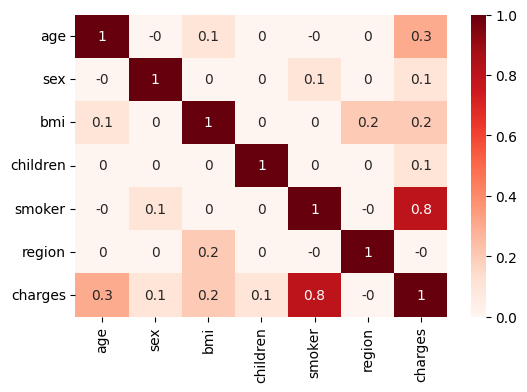

In [14]:
plt.figure(dpi=100)
sns.heatmap(np.round(df.corr(),1),annot=True, cmap="Reds")
plt.show()

In [15]:
df.corr()['charges'].sort_values(ascending =  False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

<AxesSubplot:>

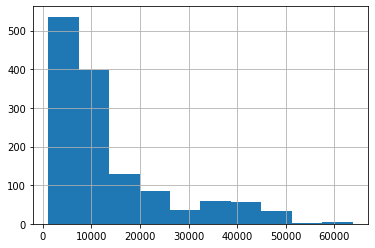

In [16]:
df.charges.hist()

# Normality Criteria 

In [17]:
from scipy.stats.mstats import normaltest
normaltest(df.charges.values)

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)

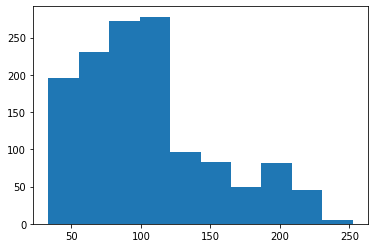

In [18]:
sqrt_charges = np.sqrt(df.charges)
plt.hist(sqrt_charges)

sqrt_test_res = normaltest(sqrt_charges.values)
sqrt_test_res

NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)

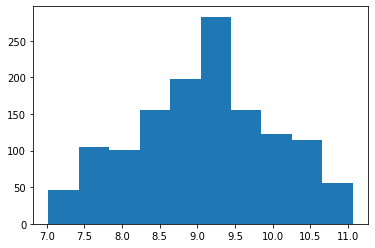

In [19]:
log_charges = np.log(df.charges)
plt.hist(log_charges)

log_test_res = normaltest(log_charges.values)
log_test_res

In [20]:
from scipy.stats import boxcox

In [21]:
bc_result = boxcox(df.charges)
boxcox_medv = bc_result[0]
lam = bc_result[1]

NormaltestResult(statistic=54.4181017156977, pvalue=1.5249631686757666e-12)

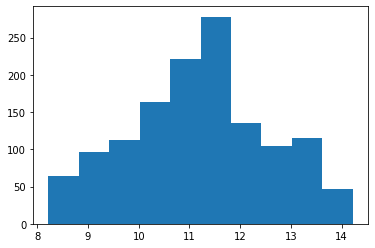

In [22]:
plt.hist(boxcox_medv)
boxcox_test_res= normaltest(boxcox_medv)
boxcox_test_res

# Boxcox trasnformation has the best performance

## Applying Regression Models

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [24]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [25]:
X = df.drop(['charges', 'region'], axis = 1)
y = df.charges

In [26]:
X.head(5)

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [27]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Vanilla Linear Regression

In [28]:
kf = KFold(shuffle=True, random_state=42, n_splits=3)

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8397793008971512, {'polynomial_features__degree': 2})

In [29]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X, y)
best_vanilla_estimator.score(X, y)

0.8438938304619277

# Lasso Regression

In [30]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso_regression__alpha": np.geomspace(0.01, 30, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8401685994822629,
 {'lasso_regression__alpha': 30.0, 'polynomial_features__degree': 2})

In [31]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.85))])

best_lasso_estimator.fit(X, y)
best_lasso_estimator.score(X, y)

0.8439616624263708

# Ridge Regression

In [32]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8399073635712647,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 16.96379809972482})

In [33]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=19.56))])

best_ridge_estimator.fit(X, y)
best_ridge_estimator.score(X, y)

0.8439083186434307

# Ploting each Model

In [34]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, y,
                                                    shuffle=True, test_size=0.3, random_state=42)

# Vanilla

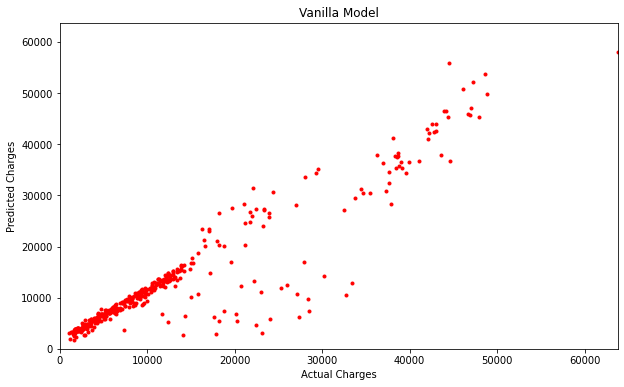

In [35]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression().fit(X_train, y_train)

f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', color='red', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Vanilla Model');

# Lasso

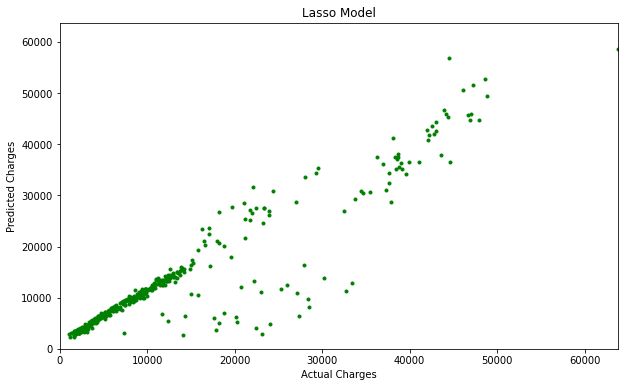

In [36]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test), 
         marker='o', ls='', color='green', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Lasso Model');

# Ridge

In [37]:
from sklearn.linear_model import RidgeCV

alphas = np.geomspace(0.01, 20, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

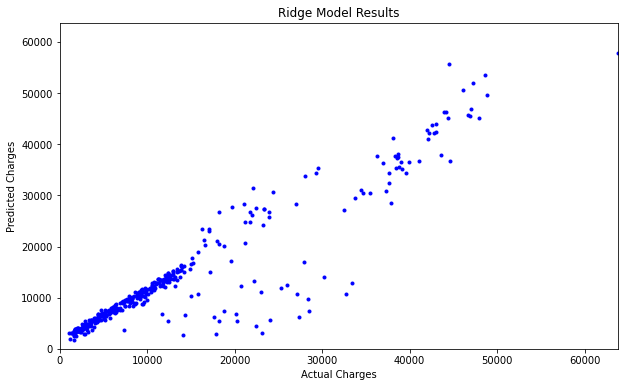

In [38]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test), 
         marker='o', ls='', color='blue', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results');

# ElasticNetCV

In [39]:
from sklearn.linear_model import ElasticNetCV
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)

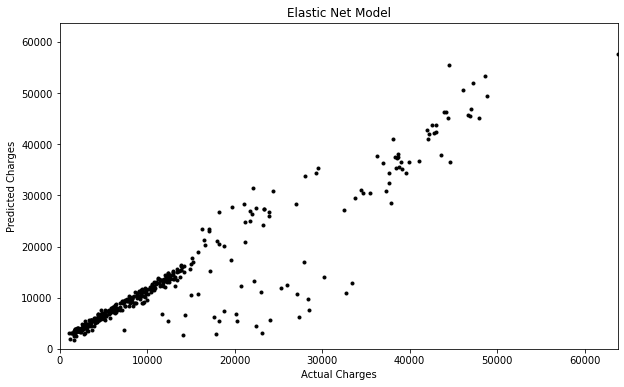

In [40]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test), 
         marker='o', ls='', color='k', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges', 
       ylabel='Predicted Charges', 
       xlim=lim,
       ylim=lim,
       title='Elastic Net Model');

# Calculating the RMSE

In [41]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

In [42]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,4496.560111,0.862103
Lasso,4496.577652,0.862102
Ridge,4494.682980,0.862218
ElasticNet,4494.417701,0.862234
